In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

In [2]:
pwd_data = pd.read_csv("./datasets/DSL-StrongPasswordData.csv", header = 0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


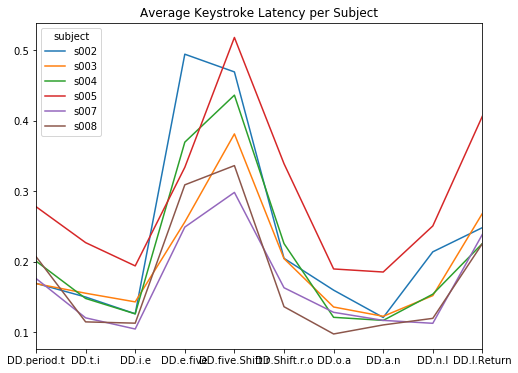

In [3]:
# Average Keystroke Latency per Subject

DD = [dd for dd in pwd_data.columns if dd.startswith('DD')]
plot = pwd_data[DD]
plot['subject'] = pwd_data['subject'].values
plot = plot.groupby('subject').mean()

plot.iloc[:6].T.plot(figsize=(8, 6), title='Average Keystroke Latency per Subject')

In [4]:
data_train, data_test = train_test_split(pwd_data, test_size = 0.2, random_state=0)

X_train = data_train[pwd_data.columns[2:]]
y_train = data_train['subject']

X_test = data_test[pwd_data.columns[2:]]
y_test = data_test['subject']

In [5]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

y_pred = knc.predict(X_test)

knc_accuracy = metrics.accuracy_score(y_test, y_pred)
print('K-Nearest Neighbor Classifier Accuracy:', knc_accuracy)


K-Nearest Neighbor Classifier Accuracy: 0.3730392156862745


In [6]:
svc = svm.SVC(kernel='linear') 
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

svc_accuracy = metrics.accuracy_score(y_test, y_pred)
print('Support Vector Linear Classifier Accuracy:', svc_accuracy)

Support Vector Linear Classifier Accuracy: 0.7629901960784313


In [7]:
mlpc = MLPClassifier()
mlpc.fit(X_train,y_train)

y_pred = mlpc.predict(X_test)

mlpc_accuracy = metrics.accuracy_score(y_test, y_pred)
print('Multi Layer Perceptron Classifier Accuracy:', mlpc_accuracy)

Multi Layer Perceptron Classifier Accuracy: 0.908578431372549


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, 'True')

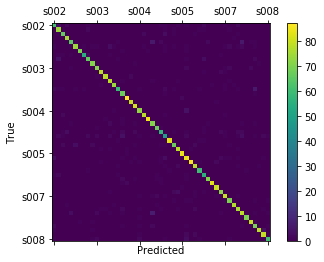

In [8]:
from sklearn.metrics import confusion_matrix

labels = list(pwd_data['subject'].unique())
cm = confusion_matrix(y_test, y_pred, labels) 

figure = plt.figure()
axes = figure.add_subplot(111)
figure.colorbar(axes.matshow(cm))
axes.set_xticklabels([''] + labels)
axes.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')